In [195]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (20,10)



In [196]:
df1 = pd.read_csv("bengaluru_House_Data.csv")
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [197]:
df1.shape

(13320, 9)

In [198]:
df1.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [199]:
df1.area_type.unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [200]:
df1.area_type.value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

In [201]:
df2 = df1.drop(['area_type','society','availability'],axis=1)

In [202]:
df2.shape

(13320, 6)

In [203]:
##Data Cleaning
df2.isnull().sum()

location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [204]:
df3 = df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

In [205]:
df3.shape

(12710, 6)

In [206]:
df3["size"].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '3 Bedroom', '1 BHK', '1 RK',
       '4 BHK', '1 Bedroom', '2 Bedroom', '6 Bedroom', '8 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '11 Bedroom', '43 Bedroom',
       '14 BHK', '8 BHK', '12 Bedroom', '10 Bedroom', '13 BHK'],
      dtype=object)

#Feature Engineering#

In [207]:
df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))

C:\Users\RaveenD\AppData\Local\Temp\ipykernel_24664\2222900254.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))


In [208]:
df3.head()

,location,size,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,1.0,51.00,2


In [209]:
df3['bhk'].unique()

array([ 2,  4,  3,  1,  6,  8,  7,  5, 11,  9, 27, 43, 14, 12, 10, 13],
      dtype=int64)

In [210]:
df3[df3.bhk > 20]

,location,size,total_sqft,bath,balcony,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,0.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,0.0,660.0,43


In [211]:
df3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [212]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [213]:
df3[~df3.total_sqft.apply(is_float)].head(20)

,location,size,total_sqft,bath,balcony,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,0.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,0.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,0.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,0.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,0.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,0.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,0.0,63.770,2
661,Yelahanka,2 BHK,1120 - 1145,2.0,0.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,0.0,445.000,4
772,Banashankari Stage VI,2 BHK,1160 - 1195,2.0,0.0,59.935,2


In [214]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    try:
        if len(tokens) > 1:
            return (float(tokens[0]) + float(tokens[1]))/2
        else:
            return float(x)
    except:
        return None

In [215]:
df4 = df3.copy()
df4["total_sqft"] = df4.total_sqft.apply(convert_sqft_to_num)

In [216]:
df4.head(20)

,location,size,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2
5,Whitefield,2 BHK,1170.0,2.0,1.0,38.00,2
8,Marathahalli,3 BHK,1310.0,3.0,1.0,63.25,3
10,Whitefield,3 BHK,1800.0,2.0,2.0,70.00,3
11,Whitefield,4 Bedroom,2785.0,5.0,3.0,295.00,4
12,7th Phase JP Nagar,2 BHK,1000.0,2.0,1.0,38.00,2


In [217]:
df4.loc[30]

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
balcony             0.0
price             186.0
bhk                   4
Name: 30, dtype: object

In [218]:
df5 = df4.copy()

In [219]:
df5['price_per_sqft'] = df5['price']*100000 / df5['total_sqft']

In [220]:
df5.head()

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.000000


In [221]:
len(df5.location.unique())

1265

In [222]:
df5.location = df5.location.apply(lambda x : x.strip())
location_stats = df5.groupby('location')['location'].agg('count').sort_values(ascending = False)

In [223]:
location_stats

location
Whitefield              515
Sarjapur  Road          372
Electronic City         302
Kanakpura Road          261
Thanisandra             234
                       ... 
Kanakapura  Rod           1
Kanakapura Main Road      1
Kanakapura Road           1
Kanakapura Road,          1
whitefiled                1
Name: location, Length: 1254, dtype: int64

In [224]:
len(location_stats[location_stats <= 10])

1017

In [225]:
location_stats_less_than_10 = location_stats[location_stats <= 10]
location_stats_less_than_10

location
1st Block Koramangala    10
Kalkere                  10
Basapura                 10
Kodigehalli              10
Gunjur Palya             10
                         ..
Kanakapura  Rod           1
Kanakapura Main Road      1
Kanakapura Road           1
Kanakapura Road,          1
whitefiled                1
Name: location, Length: 1017, dtype: int64

In [226]:
 len(df5.location.unique())

1254

In [227]:
df5.location = df5.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)

In [228]:
 len(df5.location.unique())

238

In [229]:
df5.head(20)

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,1.0,38.00,2,3247.863248
8,Marathahalli,3 BHK,1310.0,3.0,1.0,63.25,3,4828.244275
10,Whitefield,3 BHK,1800.0,2.0,2.0,70.00,3,3888.888889
11,Whitefield,4 Bedroom,2785.0,5.0,3.0,295.00,4,10592.459605
12,7th Phase JP Nagar,2 BHK,1000.0,2.0,1.0,38.00,2,3800.000000


In [230]:
#remove anomalies
df5.shape

(12710, 8)

In [231]:
df6 = df5[~(df5.total_sqft/df5.bhk < 100)]

In [232]:
df6.shape

(12681, 8)

In [233]:
df6.price_per_sqft.describe()

count     12639.000000
mean       6524.934565
std        4285.550521
min         267.829813
25%        4239.329087
50%        5363.984674
75%        7126.229291
max      176470.588235
Name: price_per_sqft, dtype: float64

In [234]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'): #gouping by location
        m = np.mean(subdf.price_per_sqft)
        st = np.mean(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft > (m - st)) & (subdf.price_per_sqft <= (m + st))]
        df_out = pd.concat([df_out,reduced_df], ignore_index = True)
    return (df_out)
                           

In [235]:
df7 = remove_pps_outliers(df6)
df7.shape

(12133, 8)

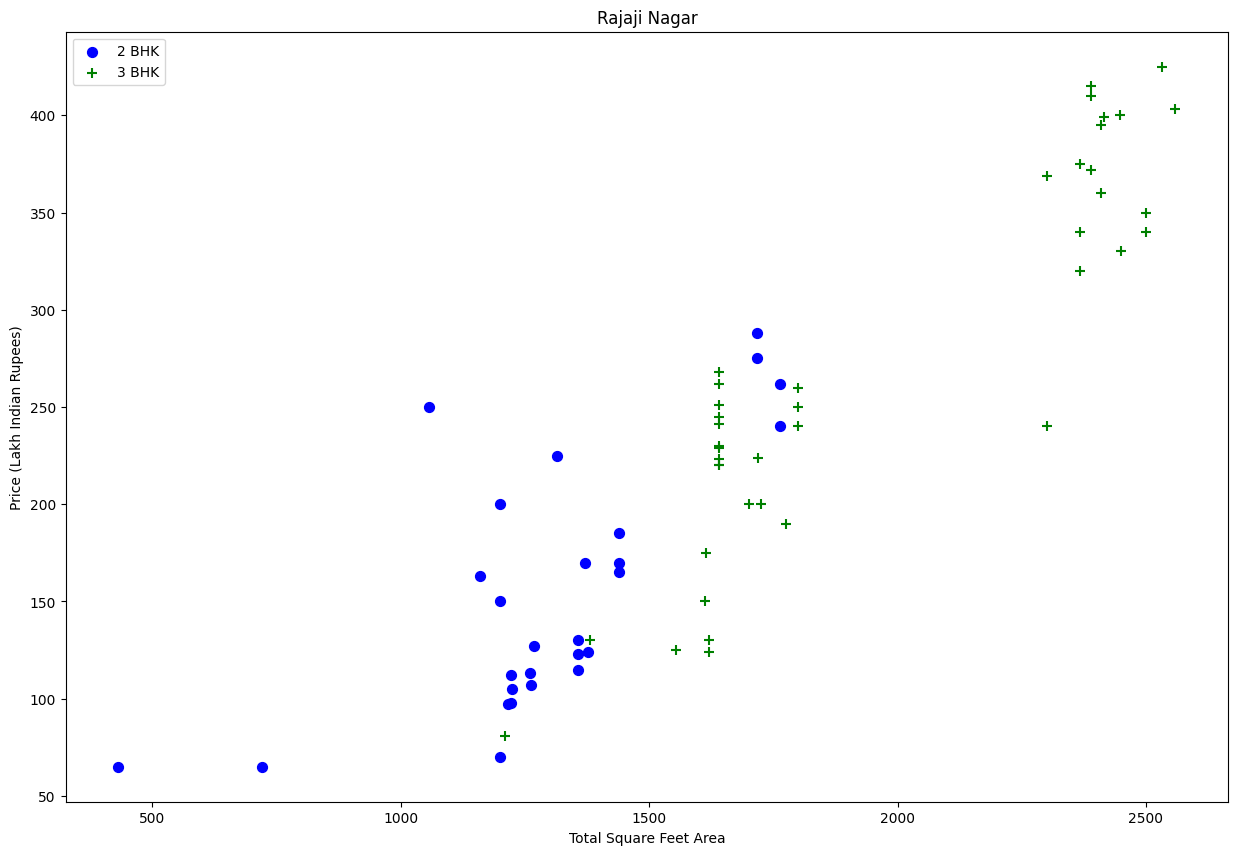

In [236]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df7,"Rajaji Nagar")



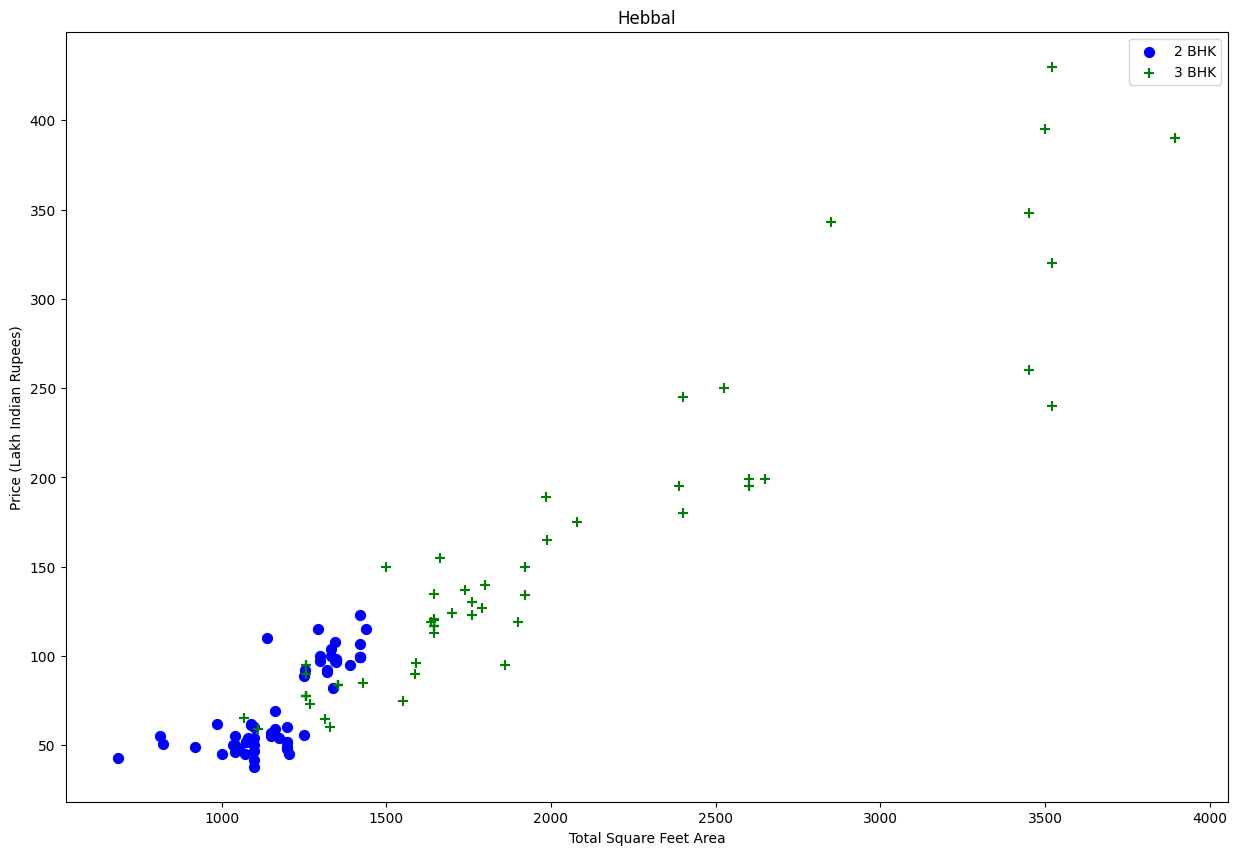

In [237]:
plot_scatter_chart(df7,"Hebbal")

In [238]:
er=df7.groupby(['location','bhk'])
er.first()

size  total_sqft  bath  balcony  price  \
location            bhk                                                
1st Block Jayanagar 2        2 BHK      1000.0   3.0      2.0   60.0   
                    3        3 BHK      1630.0   3.0      2.0  194.0   
                    4        4 BHK      2850.0   4.0      1.0  428.0   
                    6        6 BHK      1200.0   6.0      2.0  125.0   
                    7    7 Bedroom       930.0   4.0      2.0   85.0   
...                            ...         ...   ...      ...    ...   
other               8    8 Bedroom      2600.0   8.0      2.0  180.0   
                    9    9 Bedroom      1200.0   9.0      3.0  120.0   
                    11      11 BHK      5000.0   9.0      3.0  360.0   
                    13      13 BHK      5425.0  13.0      0.0  275.0   
                    27      27 BHK      8000.0  27.0      0.0  230.0   

                         price_per_sqft  
location            bhk                  
1st Block Jayanagar 2       6000.000000  
                    3      11901.840491  
                    4      15017.543860  
                    6      10416.666667  
                    7       9139.784946  
...                                 ...  
other               8       6923.076923  
                    9      10000.000000  
                    11      7200.000000  
                    13      5069.124424  
                    27      2875.000000  

[983 rows x 6 columns]

In [239]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df8 = remove_bhk_outliers(df7)
# df8 = df7.copy()
df8.shape

(8684, 8)

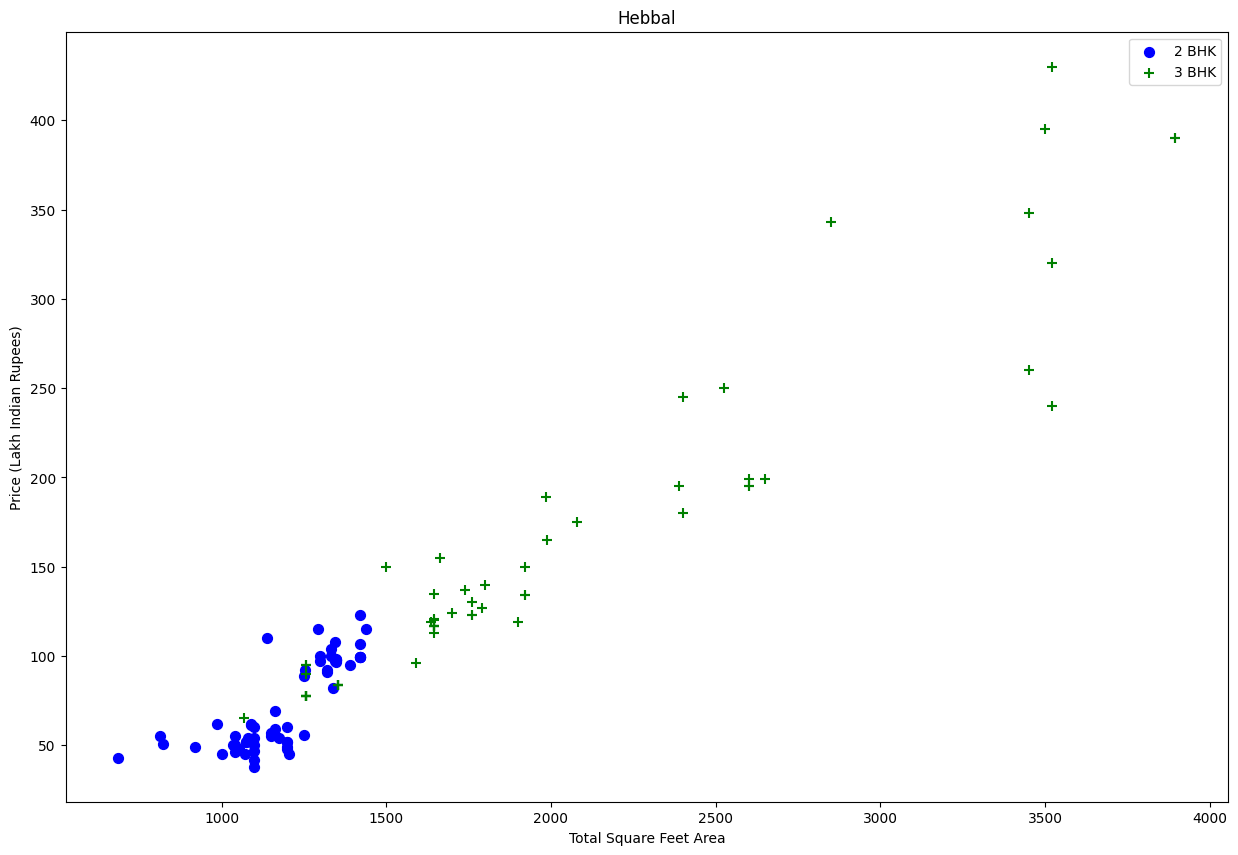

In [240]:
plot_scatter_chart(df8,"Hebbal")

Text(0, 0.5, 'Count')

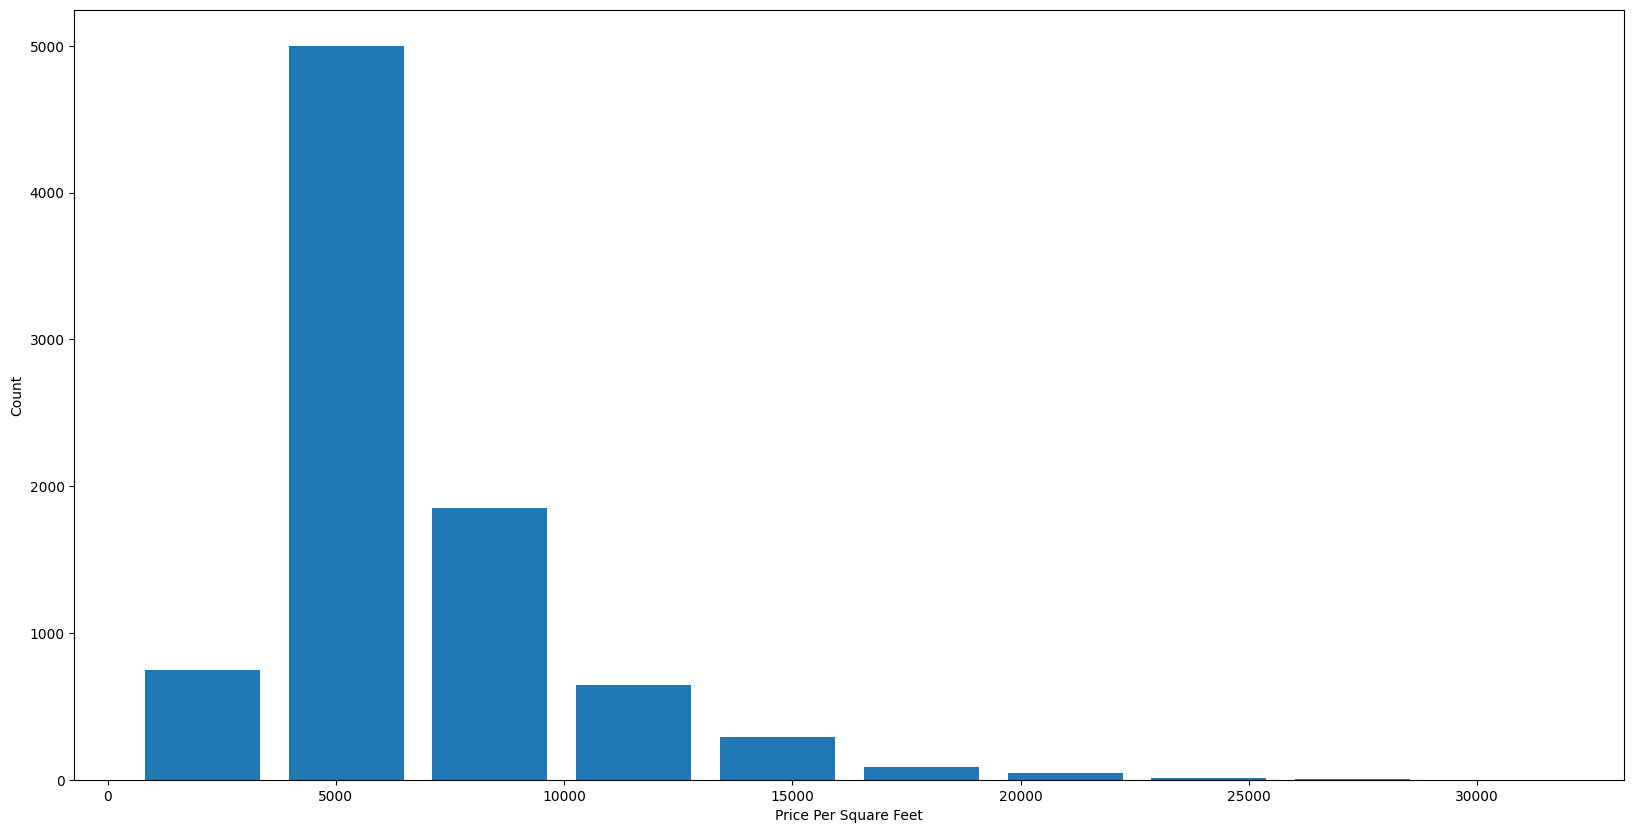

In [241]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df8.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")



In [242]:
df8.bath.unique()

array([ 4.,  3.,  6.,  2.,  7.,  1.,  8.,  5.,  9., 10., 27., 11., 12.,
       13.])

In [243]:
df8[(df8.bath >= 10)]

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
4045,Hoskote,9 Bedroom,1800.0,10.0,3.0,185.0,9,10277.777778
6246,Munnekollal,10 Bedroom,7200.0,10.0,3.0,200.0,10,2777.777778
7053,Rajaji Nagar,8 Bedroom,1200.0,10.0,2.0,180.0,8,15000.000000
8700,Vidyaranyapura,9 BHK,4700.0,10.0,3.0,130.0,9,2765.957447
9986,other,27 BHK,8000.0,27.0,0.0,230.0,27,2875.000000
9992,other,11 Bedroom,1200.0,11.0,0.0,170.0,11,14166.666667
10039,other,8 Bedroom,990.0,12.0,0.0,120.0,8,12121.212121
10079,other,8 Bedroom,1500.0,10.0,3.0,165.0,8,11000.000000
11488,other,13 BHK,5425.0,13.0,0.0,275.0,13,5069.124424


Text(0, 0.5, 'Count')

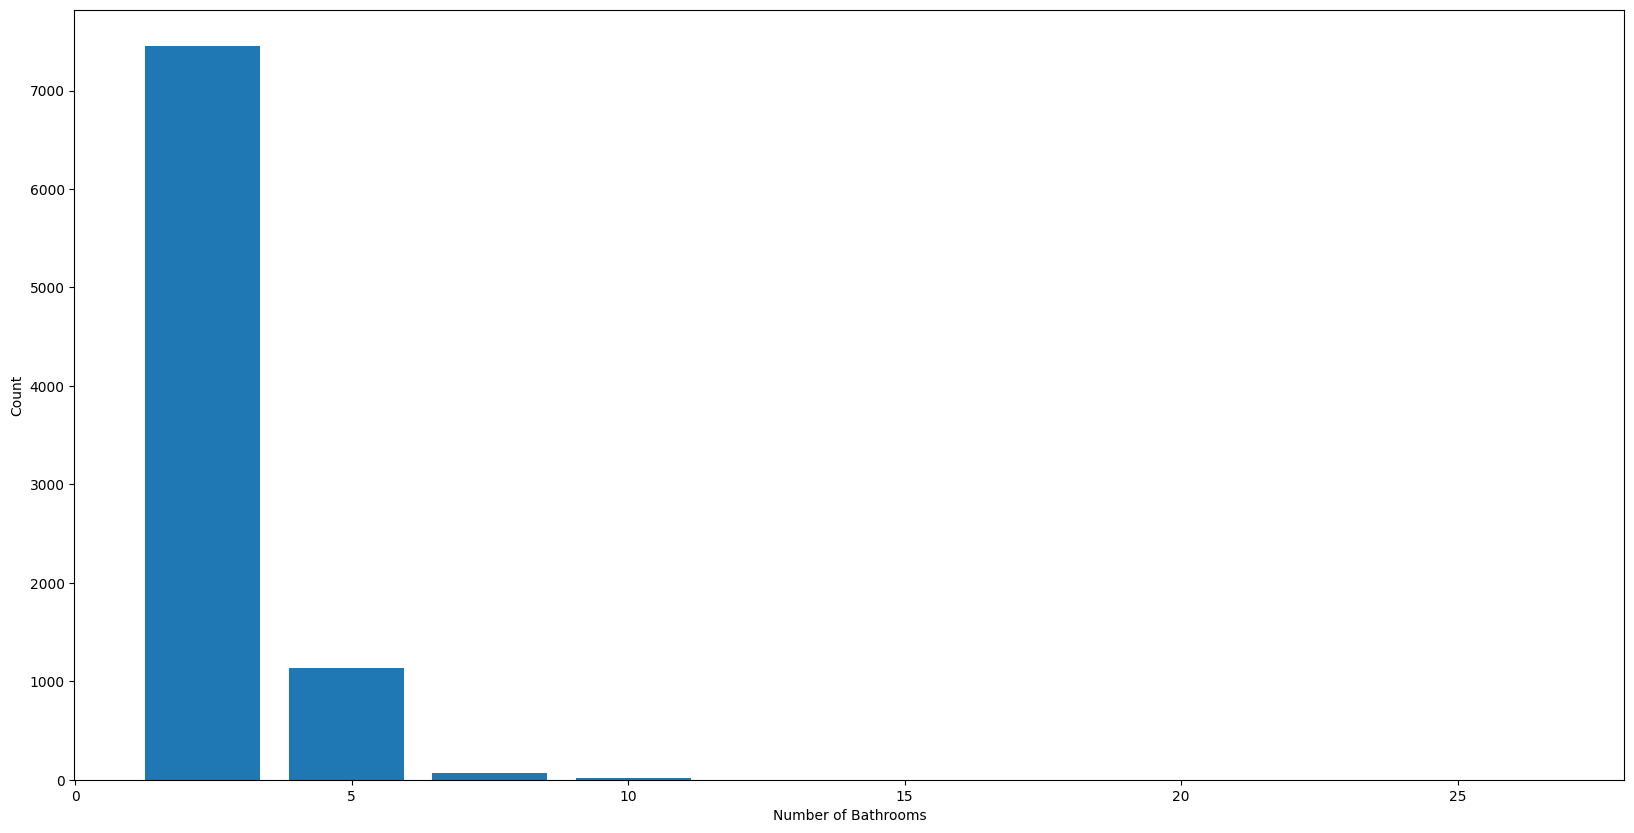

In [244]:
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df8.bath,rwidth=0.8)
plt.xlabel("Number of Bathrooms")
plt.ylabel("Count")

In [245]:
df8[df8.bath > df8.bhk+2]

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
1798,Chamrajpet,6 Bedroom,1500.0,9.0,3.0,230.0,6,15333.333333
1953,Chikkabanavar,4 Bedroom,2460.0,7.0,2.0,80.0,4,3252.032520
7008,Rajaji Nagar,5 BHK,7500.0,8.0,3.0,1700.0,5,22666.666667
8248,Thanisandra,3 BHK,1806.0,6.0,2.0,116.0,3,6423.034330
10039,other,8 Bedroom,990.0,12.0,0.0,120.0,8,12121.212121
11503,other,6 Bedroom,1200.0,9.0,3.0,122.0,6,10166.666667


In [246]:
df9 = df8[df8.bath < df8.bhk+2]
df9.shape

(8580, 8)

In [247]:
df10 = df9.drop(['size', 'price_per_sqft'], axis =1)
df10.head()

,location,total_sqft,bath,balcony,price,bhk
0,1st Block Jayanagar,2850.0,4.0,1.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,2.0,194.0,3
2,1st Block Jayanagar,1200.0,6.0,2.0,125.0,6
3,1st Block Jayanagar,1875.0,2.0,3.0,235.0,3
4,1st Block Jayanagar,2400.0,4.0,2.0,450.0,4


In [248]:
#One hot encoding
dummies = pd.get_dummies(df10.location)
dummies

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12124,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
12125,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
12126,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
12129,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [249]:
df11 = pd.concat([df10, dummies.drop('other', axis=1)], axis=1)
df11.head()

,location,total_sqft,bath,balcony,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,1.0,428.0,4,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,2.0,194.0,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1200.0,6.0,2.0,125.0,6,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1875.0,2.0,3.0,235.0,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,2400.0,4.0,2.0,450.0,4,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [250]:
df12 = df11.drop('location', axis=1)


In [251]:
df12.shape

(8580, 242)

In [265]:
X = df12.drop('price', axis=1)
X

,total_sqft,bath,balcony,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,1.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,2.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1200.0,6.0,2.0,6,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1875.0,2.0,3.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2400.0,4.0,2.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12124,1903.0,2.0,1.0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12125,1200.0,2.0,3.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12126,1800.0,1.0,1.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12129,1353.0,2.0,2.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [266]:
y = df12.price
y

0        428.0
1        194.0
2        125.0
3        235.0
4        450.0
         ...  
12124    293.0
12125     70.0
12126    200.0
12129    110.0
12130     26.0
Name: price, Length: 8580, dtype: float64

In [286]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [287]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train, y_train)
lr_clf.score(X_test, y_test)

0.6878853583438465

In [269]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.31386134, 0.39688176, 0.71091543, 0.77030212, 0.7279648 ])

In [271]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import ShuffleSplit
from sklearn.ensemble import RandomForestClassifier

def find_best_model_using_gridsearchcv(x,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        },
        }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(x,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])
find_best_model_using_gridsearchcv(X,y)

ValueError: Invalid parameter 'normalize' for estimator LinearRegression(). Valid parameters are: ['copy_X', 'fit_intercept', 'n_jobs', 'positive'].

In [277]:
def predict_price(location, sqft, bath, bhk):
    loc_index = np.where(X.columns==location)[0][0]
    
    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1
    
    return lr_clf.predict([x])[0]

In [278]:
x.columns

Index(['total_sqft', 'bath', 'balcony', 'bhk', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Phase JP Nagar', '6th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=241)

In [279]:
predict_price("1st Phase JP Nagar", 1000, 2, 2)

C:\Users\RaveenD\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


104.46946461574491

In [282]:
predict_price("1st Phase JP Nagar", 1000, 2, 3)

C:\Users\RaveenD\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


103.27818499689354

In [281]:
predict_price("Indira Nagar", 1000, 2, 2)

C:\Users\RaveenD\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


159.57434783634397

In [283]:
predict_price("Indira Nagar", 1000, 3, 3)

C:\Users\RaveenD\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


165.8843732395768

In [284]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:

    pickle.dump(lr_clf,f)

In [285]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))